# Get the data

In [1]:
import pandas as pd

data = pd.read_csv("bin-data.csv")
data

,Unnamed: 0,Asset,Open time,Open,High,Low,Close,Volume,Closing time,Quote asset vol,Num traders,Taker buy base asset vol,Taker buy quote asset vol,To be ignored
0,0,ETHBTC,1634774400000,0.063057,0.066299,0.062904,0.065148,219179.4803,1634860799999,14185.381377,441192,100293.9821,6492.487566,0
1,1,ETHBTC,1634860800000,0.065160,0.065960,0.064685,0.065446,97034.6275,1634947199999,6338.327303,199872,52745.0758,3446.038753,0
2,2,ETHBTC,1634947200000,0.065445,0.068079,0.065181,0.067997,78071.8103,1635033599999,5183.565102,170954,39062.4171,2593.452923,0
3,3,ETHBTC,1635033600000,0.067998,0.068163,0.066101,0.067079,75865.3395,1635119999999,5087.916649,161735,36494.9300,2447.367339,0
4,4,ETHBTC,1635120000000,0.067081,0.067245,0.065269,0.066897,83641.3418,1635206399999,5546.270472,180063,41199.6332,2731.174031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,361,QTUMETH,1665964800000,0.002043,0.002058,0.002038,0.002053,1748.5000,1666051199999,3.577257,55,629.4000,1.289472,0
1826,362,QTUMETH,1666051200000,0.002053,0.002059,0.002020,0.002054,2889.4000,1666137599999,5.884752,147,795.5000,1.625642,0
1827,363,QTUMETH,1666137600000,0.002052,0.002063,0.002005,0.002011,3764.5000,1666223999999,7.690868,128,1750.6000,3.577481,0
1828,364,QTUMETH,1666224000000,0.002017,0.002057,0.002013,0.002030,3651.6000,1666310399999,7.457298,152,1642.9000,3.351432,0


In [2]:
from cmath import exp
import numpy as np

# Unique asset list
asset_list = data["Asset"].unique()

stddev = []
for asset in asset_list:
    close_price = np.array(data[data["Asset"] == asset]["Close"].astype("float"))
        
    # Sign will be used to indicate the value gradient direction
    sigma = close_price.std()
    stddev.append(sigma)

In [3]:
filter = data.groupby("Asset").agg({"Open time":max}).reset_index()
price = data.merge(filter, how='inner').drop_duplicates()
price["Stddev"] = stddev
dataframe = price[["Asset","Close", "Stddev"]].to_dict('records')
dataframe

C:\Users\al3xd\AppData\Local\Temp\ipykernel_118108\2394680916.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  filter = data.groupby("Asset").agg({"Open time":max}).reset_index()


[{'Asset': 'ETHBTC', 'Close': 0.06783, 'Stddev': 0.007412039833057027},
 {'Asset': 'LTCBTC', 'Close': 0.002695, 'Stddev': 0.0004000306894319284},
 {'Asset': 'BNBBTC', 'Close': 0.014092, 'Stddev': 0.0017231367826536588},
 {'Asset': 'NEOBTC', 'Close': 0.00041, 'Stddev': 9.726176349173795e-05},
 {'Asset': 'QTUMETH', 'Close': 0.002021, 'Stddev': 0.0004316506717217086}]

# Black-Scholes-Merton (BSM) Model

Used to determine the fair prices of stock options based on six variables: volatility, type, underlying stock price, strike price, time and risk-free rate. It is based on the principle of hedging: recognizing the dangers that come with every investment and choosing to be protected from any untoward event that can impact one's finances.

$$
S(t) = S_0 \exp{\left( (r - \frac{1}{2}\sigma^2)t + \sigma\sqrt{t} z \right)}
$$

Where $S_0$ is the initial stock index level, $t$ the time to maturity, $r$ the risk-free rate, $\sigma$ the volatility and $z$ a normally distributed random variable. 

# Monte Carlo Methods 

Good optiom for simulating scenarios when multiple sources of uncertainty arise. 

In [4]:
import numpy as np
from scipy.stats import norm

# Time
t = 1.0 # year

# Riskless short rate
r = 0.05

# Volatility (stdev)
sigma = 0.25

# Present price
S0 = 100

# Number of samples
I = 1000

# z_i values
z = np.random.standard_normal(I)

# s_t for each z_i
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * t + sigma * np.sqrt(t) * z)

* Call Value: $C_0 \sim e^{-rt}\frac{1}{T}\sum_I h_i(t)$, where $h_i(t) = \max(S_i(t)-K, 0)$
* Put Value: $P_0 \sim e^{-rt}\frac{1}{T}\sum_I h_i(t)$, where $h_i(t) = \max(K - S_i(t), 0)$

In [6]:
K = 105 # Strike price

hT = np.maximum(ST - K, 0)
C0 = np.exp(-r * t) * sum(hT) / I
print(C0)

9.79731359408445


In [7]:
hT = np.maximum(K - ST, 0)
P0 = np.exp(-r * t) * sum(hT) / I
print(P0)

9.453663799854134


# Plot

In [8]:
months = 12 # in a year
dt = t/months

S = np.zeros((months+1, I))  
S[0] = S0  
for ti in range(1, months+1):
    Z = np.random.normal(size=I)
    S[ti] = S[ti-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*Z)

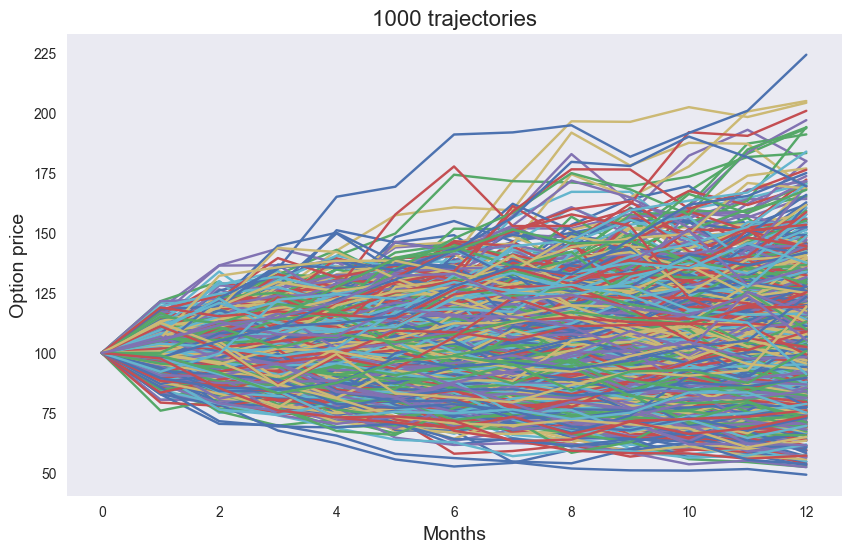

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-v0_8')

plt.figure(figsize=(10, 6))
for si in S.T:
    plt.plot(range(len(si)), si)

plt.xlabel("Months", fontsize=14)
plt.ylabel("Option price", fontsize=14)
plt.grid()

plt.title(f"{I} trajectories", fontsize=16)
plt.show()

Price distribution at time $t$

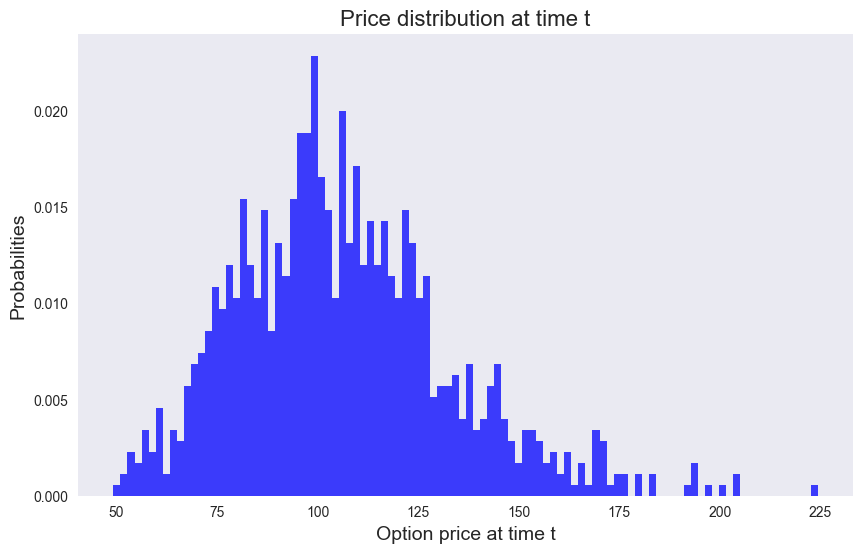

In [10]:
plt.figure(figsize=(10, 6)) 

# the histogram of the data
plt.hist(S[-1], 100, density=True, facecolor='b', alpha=0.75)

plt.xlabel("Option price at time t", fontsize=14)
plt.ylabel("Probabilities", fontsize=14)
plt.grid()

plt.title(f"Price distribution at time t", fontsize=16)
plt.show()

# Real Asset 

Price distribution of an option from an asset in the initial data frame at time $t$. 

In [11]:
def St(S0, sigma, t, r, num_samples = 1000):

    # z_i values
    z = np.random.standard_normal(num_samples)

    # s_t for each z_i
    return S0 * np.exp((r - 0.5 * sigma ** 2) * t + sigma * np.sqrt(t) * z)

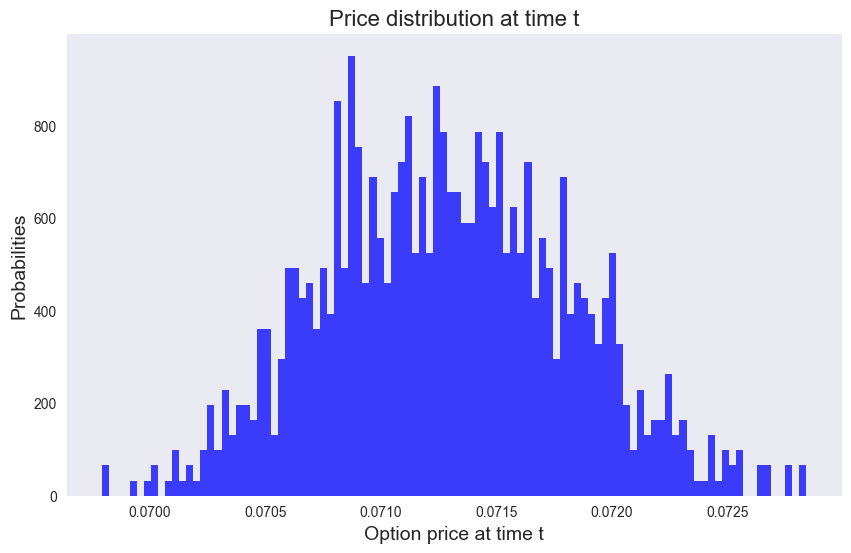

In [14]:
asset_name = price.iloc[0]["Asset"]
S0 = float(price.iloc[0]["Close"])
sigma = price.iloc[0]["Stddev"]

t = 1.0 #year
r = 0.05 # riskless short rate
ST = St(S0, sigma, t, r)

plt.figure(figsize=(10, 6)) 

# the histogram of the data
plt.hist(ST, 100, density=True, facecolor='b', alpha=0.75)

plt.xlabel("Option price at time t", fontsize=14)
plt.ylabel("Probabilities", fontsize=14)
plt.grid()

plt.title(f"Price distribution at time t", fontsize=16)
plt.show()

In [16]:
print(np.mean(ST))

0.07128299743587055


In [17]:
print(np.std(ST))

0.0005333897739052285


In [18]:
def payoff_function(St, K):

    hT = np.maximum(St - K, 0)
    C0 = np.exp(-r * t) * sum(hT) / I

    return C0

Assuming a strike price with an increase of 5%.

In [21]:
K = S0*1.05 # strike price

C0 = payoff_function(ST, K)
print(f'For asset {asset_name} with initial value of {S0}, its payoff value is {C0:.5f} at {t} years (K = {K:.5f})')

For asset ETHBTC with initial value of 0.06783, its payoff value is 0.00024 at 1.0 years (K = 0.07122)
